In [1]:
import pandas as pd
import numpy as np
import os
import pylab as pl
import statsmodels.api as sm
from statsmodels.formula.api import ols

%pylab inline

PUIdata = os.getenv('PUIDATA')

Populating the interactive namespace from numpy and matplotlib


### Goal: Find outliers, trends and periodicity in the MTA turnstile data

In [2]:
!wget https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy?raw=true 
#was not able to read data from PUIdata when use curl function due to error and used this one

--2016-11-15 12:16:20--  https://github.com/fedhere/PUI2016_fb55/blob/master/HW9_fb55/MTA_Fare.npy?raw=true
Resolving github.com... 192.30.253.112, 192.30.253.113
Connecting to github.com|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy [following]
--2016-11-15 12:16:20--  https://github.com/fedhere/PUI2016_fb55/raw/master/HW9_fb55/MTA_Fare.npy
Connecting to github.com|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy [following]
--2016-11-15 12:16:20--  https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW9_fb55/MTA_Fare.npy
Resolving raw.githubusercontent.com... 151.101.20.133
Connecting to raw.githubusercontent.com|151.101.20.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10708880 (10M) [application/

In [3]:
os.system("mv MTA_Fare.npy?raw=true " + os.getenv("PUIDATA") + '/MTA_Fare.npy')

0

In [4]:
rides = np.load(os.getenv("PUIDATA") + '/' + "MTA_Fare.npy")

In [5]:
rides.shape
#stations, cards, weeks respectevely 

(600, 23, 194)

In [6]:
rides

array([[[56961, 64703, 68002, ..., 36527, 33929, 36824],
        [ 1732,  2083,  2107, ...,  1264,  1172,  1238],
        [  203,   276,   245, ...,   186,   167,   167],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [   -1,    -1,    -1, ...,  1121,  1377,   712]],

       [[16210, 20179, 21769, ...,    -1,    -1,    -1],
        [  503,   647,   665, ...,    -1,    -1,    -1],
        [   41,    43,    44, ...,    -1,    -1,    -1],
        ..., 
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [    0,     0,     0, ...,    -1,    -1,    -1],
        [   -1,    -1,    -1, ...,    -1,    -1,    -1]],

       [[ 3292,  3429,  3629, ...,  3746,  3406,  3217],
        [  110,    92,   102, ...,   212,   209,   211],
        [    7,     6,    13, ...,    26,    20,    22],
        ..., 
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0, 

In [7]:
rides = rides.astype('float')  
rides[rides == -1] = 'nan' #converted -1 to nan

In [8]:
rides

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

In [9]:
date = pd.date_range(start = '5/21/2010', periods = 194, freq = 'W-FRI')
date.shape 

(194,)

### Task_1 Identify the most prominent event.

In [10]:
mta_allsum = np.nansum(rides, axis=1)
print (mta_allsum.shape) #stations, weeks

(600, 194)


In [11]:
weeks = np.nansum(mta_allsum, axis=0)
print (weeks.shape) #weeks

(194,)


In [12]:
weeks_mean = np.nanmean(weeks) #calculating mean and std for plotting
weeks_std = np.nanstd(weeks)
print weeks_mean
print weeks_std

29781349.8711
2983960.4217


In [13]:
print ("mean rides by week {:.2f}".format(weeks.mean()))
print ("stdev rides by week {:.2f}".format(weeks.std()))
thresholds = [weeks.mean() + 3 * weeks.std(), 
              weeks.mean() - 3 * weeks.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("earliest datapoint", min(date))

mean rides by week 29781349.87
stdev rides by week 2983960.42
3-sigma thresholds 38733231.14 20829468.61
('earliest datapoint', Timestamp('2010-05-21 00:00:00', offset='W-FRI'))


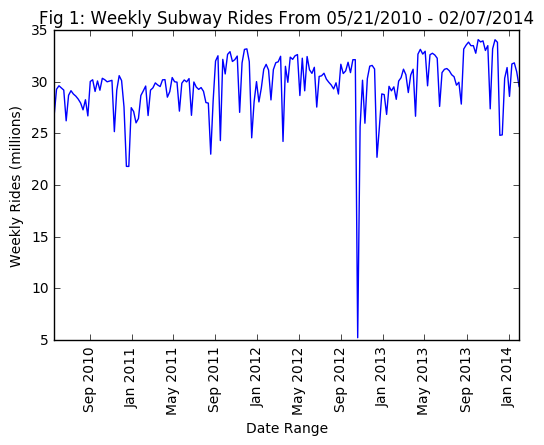

In [14]:
#plotting the total rides per week timeseries;
plt.plot(date, weeks/1e6, 'blue')
plt.ylabel('Weekly Rides (millions)', size=10)
plt.xlabel('Date Range', size=10)
plt.xticks(rotation=90)
plt.title('Fig 1: Weekly Subway Rides From 05/21/2010 - 02/07/2014', size = 12)
plt.show()

### Figure1 : 
From the plot we can see that the most prominent 
prominent event happened between Spe2012 and Jan2013

In [15]:
lowseg = [weeks.mean() - 3 * weeks.std()] #3s sigma treshold
highseg =[weeks.mean() + 3 * weeks.std()]

event = np.where(weeks < lowseg)
print(event)


(array([126]),)


In [16]:
print(weeks[126])

5218686.0


In [17]:
week = pd.DataFrame()
week['Weekly Ridership Count'] = weeks
week = week.set_index(date)
week['Week Number'] = [i for i in range(0,len(weeks))]
week.loc[week['Week Number'] == 126]

,Weekly Ridership Count,Week Number
2012-10-19,5218686.0,126


In [18]:
week.loc[week['Week Number'] == 0]

,Weekly Ridership Count,Week Number
2010-05-21,26720267.0,0


#### According to result we can say that on 10/19/2012 the most promonent event was happened.The event that most possibly affected MTA rides from the history was Hurrivane Sandy.   

### Task_2 Identify the ridership types that have steadily increased in popularity, and that have steadily decreased.

In [19]:
mta_ridetypesum = np.nansum(rides, axis=0)
mta_ridetypesum.shape #cards, weeks

(23, 194)

In [20]:
mta_ridetypesum[0]

array([ 11494615.,  12526859.,  12766627.,  12653675.,  12809694.,
        11429783.,  12346877.,  12576759.,  12437115.,  12431257.,
        12401572.,  12280641.,  11913505.,  12391812.,  11878127.,
        12918455.,  12812272.,  12292468.,  12662413.,  12400611.,
        12721967.,  12633600.,  12648413.,  12699903.,  12767910.,
        11074280.,  12651006.,  13210412.,  13306773.,  12600160.,
        10897611.,  10891186.,  12679761.,  12143325.,  11754961.,
        11912201.,  13216489.,  13164779.,  13382528.,  12154310.,
        13055840.,  13215534.,  13518602.,  13262819.,  13186542.,
        13534859.,  13589465.,  13007162.,  13178854.,  13739517.,
        13741510.,  13791231.,  12620609.,  13847203.,  14028576.,
        13939790.,  14440960.,  12781306.,  14120142.,  13830819.,
        13753535.,  13922835.,  13823650.,  13364902.,  13271985.,
        11175879.,  13699219.,  14184755.,  14332556.,  10985709.,
        14021552.,  13566791.,  14183762.,  14252376.,  138914

In [21]:
mta_ridetypesum[0][193]

12459947.0

In [22]:
percentages = []
for k in range(0,194): #loops through each of the 194 stations
    divided = mta_ridetypesum[:,k] / weeks[k] 
    percentages.append(divided)
    k+=1     

In [23]:
percentages = np.asarray(percentages)
percentages.shape #weeks, cards

(194, 23)

In [24]:
percentages

array([[  4.30183389e-01,   1.98547417e-02,   1.78894170e-03, ...,
          2.29339026e-04,   1.33980697e-05,   0.00000000e+00],
       [  4.28034969e-01,   1.99389591e-02,   1.75924455e-03, ...,
          2.09116588e-04,   1.61962848e-05,   0.00000000e+00],
       [  4.31287642e-01,   1.98030559e-02,   1.74438939e-03, ...,
          2.19247950e-04,   1.57088285e-05,   0.00000000e+00],
       ..., 
       [  4.14525673e-01,   2.18468089e-02,   1.84706662e-03, ...,
          1.69649412e-04,   2.70911066e-05,   3.55994426e-02],
       [  4.03843909e-01,   2.16520901e-02,   1.82607172e-03, ...,
          1.86047714e-04,   2.61675027e-05,   4.45623849e-02],
       [  4.21865975e-01,   2.30062507e-02,   1.86867785e-03, ...,
          2.09376428e-04,   2.77633685e-05,   1.81145145e-02]])

In [25]:
#average usage for first 10 weeks per card
first10avg = []
for i in range(0,23):
    first10avg.append([np.sum(percentages[:,i][0:10]) / 10])
first10avg

[[0.4323758332138799],
 [0.018667879914906437],
 [0.001747888774052175],
 [0.0066771984615906846],
 [0.0016809924695701049],
 [0.1377988203571609],
 [0.31921905128417161],
 [0.00038445715784217666],
 [0.011499455022934802],
 [0.020970967982928107],
 [0.0014416294491197837],
 [0.0046142340963523194],
 [2.0149192786130862e-07],
 [0.0047993768693420091],
 [0.029531165859038498],
 [0.0022565820764281789],
 [0.0010920669776073161],
 [1.5862125688679772e-05],
 [0.0042370026074303865],
 [0.00074052545834824609],
 [0.00023214493048325028],
 [1.6663419196558629e-05],
 [0.0]]

In [26]:
#average usage for last 10 weeks per card
last10avg = []
for i in range(0,23):
    last10avg.append([np.sum(percentages[:,i][184:]) / 10])
last10avg

[[0.42486319148923801],
 [0.02241711221425282],
 [0.0018649674754867968],
 [0.005993728087443086],
 [0.0016359719489394387],
 [0.18469016252295994],
 [0.27426700469108073],
 [7.5001053141189809e-08],
 [1.1986040162549634e-07],
 [3.1234335191217004e-08],
 [0.0011225143010573295],
 [0.0053331510412701717],
 [0.0048449949884155326],
 [0.0026290407299293206],
 [0.018320167354906304],
 [0.0055663354538111991],
 [0.0030260589267161911],
 [0.001101266026220796],
 [0.0063353579037410237],
 [0.00072973476735097432],
 [0.00018290667630431766],
 [2.656074433966059e-05],
 [0.035049546560746478]]

In [27]:
first10avg = np.asarray(first10avg)
last10avg = np.asarray(last10avg)
ratt = last10avg / first10avg

In [28]:
#radership ratio per type of card
ridertype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])
riderdict = dict(zip(ridertype, ratt))
print(riderdict)

{'7d': array([ 1.34028841]), 'month': array([ 0.54778793]), '14d': array([ 1.20083868]), 'ez': array([  1.48940837e-06]), 'sen': array([ 2.77094628]), '30d': array([ 0.97321789]), '10t': array([ 0.98262474]), 'rr': array([ 2.46671083]), '1d': array([ 1.06698292]), 'stud': array([ inf]), 'ada': array([ 0.85918119]), 'spec': array([ 69.42739251]), 'exp': array([  1.04231376e-05]), 'ff': array([ 0.77864274]), 'tcmc': array([ 1.49524522]), '2t': array([ 0.89764115]), 'mc': array([ 1.15580418]), 'afas': array([ 0.00019508]), 't': array([ 0.98542833]), 'xbus': array([ 1.59395524]), 'mr': array([ 24045.6034137]), 'umlim': array([ 0.78789865]), 'rfm': array([ 0.62036722])}


In [29]:
riderdict = dict( (key, value) for (key, value) in riderdict.items() if value > 1.05 or value < .95 )
riderdict

{'14d': array([ 1.20083868]),
 '1d': array([ 1.06698292]),
 '2t': array([ 0.89764115]),
 '7d': array([ 1.34028841]),
 'ada': array([ 0.85918119]),
 'afas': array([ 0.00019508]),
 'exp': array([  1.04231376e-05]),
 'ez': array([  1.48940837e-06]),
 'ff': array([ 0.77864274]),
 'mc': array([ 1.15580418]),
 'month': array([ 0.54778793]),
 'mr': array([ 24045.6034137]),
 'rfm': array([ 0.62036722]),
 'rr': array([ 2.46671083]),
 'sen': array([ 2.77094628]),
 'spec': array([ 69.42739251]),
 'stud': array([ inf]),
 'tcmc': array([ 1.49524522]),
 'umlim': array([ 0.78789865]),
 'xbus': array([ 1.59395524])}

In [30]:
df1 = pd.DataFrame(mta_ridetypesum).T

In [31]:
df1 = df1.rename(columns={0:'10t', 1:'14d', 2:'1d', 3:'2t', 4:'30d', 5:'7d', 6:'ada', 7:'afas', 8:'exp', 9:'ez',
            10:'ff', 11:'mc', 12:'mr', 13:'month', 14:'rfm', 15:'rr', 16:'sen', 17:'spec', 18:'tcmc', 19:'t',
            20:'umlim', 21:'xbus', 22:'stud'})
df1 = df1.drop(['30d', '10t', 't'], axis=1)

In [32]:
df1.columns

Index([u'14d', u'1d', u'2t', u'7d', u'ada', u'afas', u'exp', u'ez', u'ff',
       u'mc', u'mr', u'month', u'rfm', u'rr', u'sen', u'spec', u'tcmc',
       u'umlim', u'xbus', u'stud'],
      dtype='object')

In [33]:
df1 = df1.set_index(pd.DatetimeIndex(date))
df1.head()

,14d,1d,2t,7d,ada,afas,exp,ez,ff,mc,mr,month,rfm,rr,sen,spec,tcmc,umlim,xbus,stud
2010-05-21,530524.0,47801.0,186551.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,35898.0,119881.0,4.0,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,6128.0,358.0,0.0
2010-05-28,583533.0,51486.0,199229.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,44577.0,143569.0,3.0,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,6120.0,474.0,0.0
2010-06-04,586194.0,51636.0,199668.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,45842.0,136383.0,12.0,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,6490.0,465.0,0.0
2010-06-11,562602.0,52063.0,196389.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,44271.0,134418.0,6.0,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,6590.0,484.0,0.0
2010-06-18,548858.0,51153.0,194883.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,41636.0,136351.0,9.0,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,6313.0,452.0,0.0


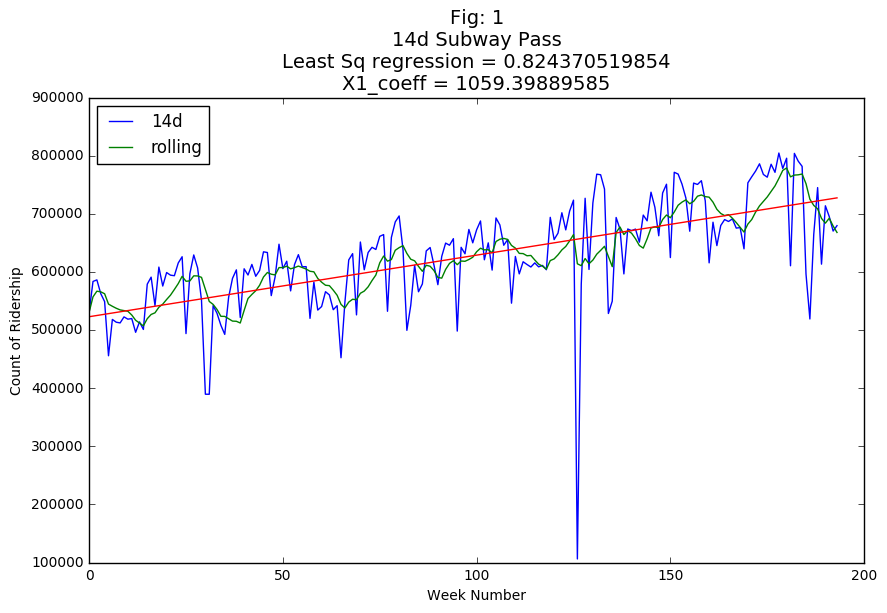

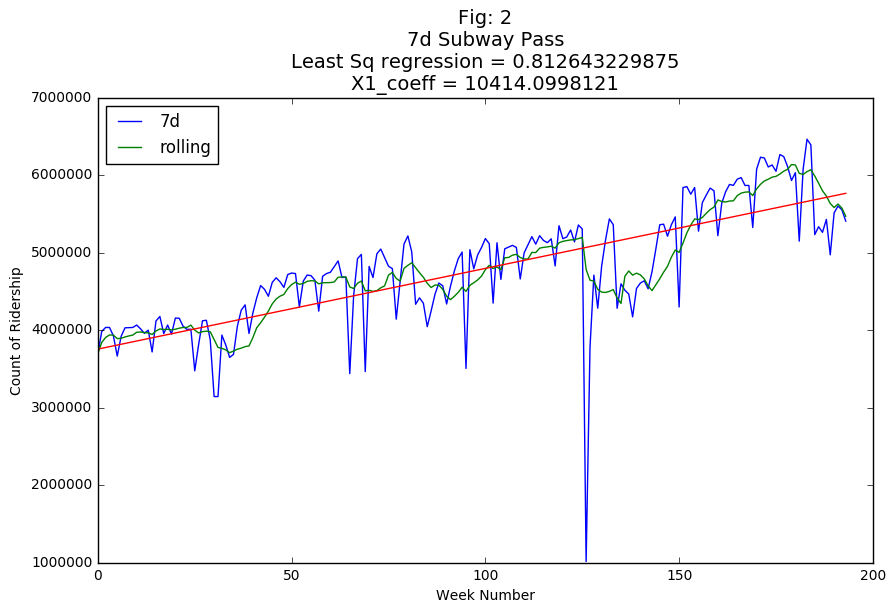

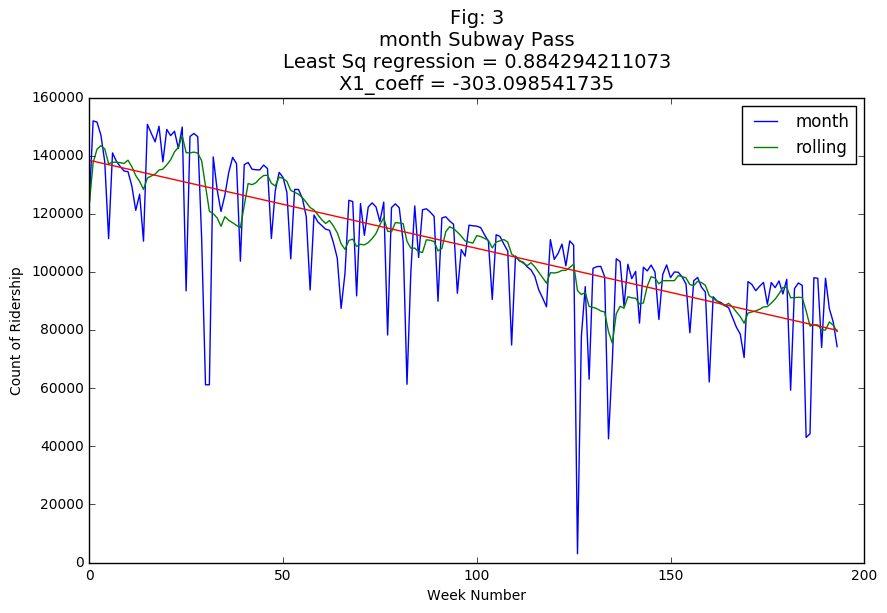

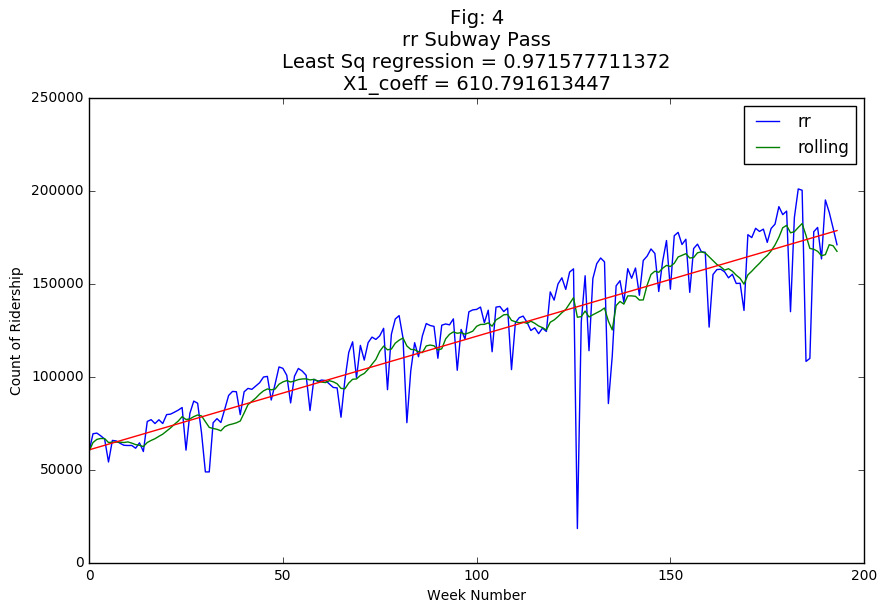

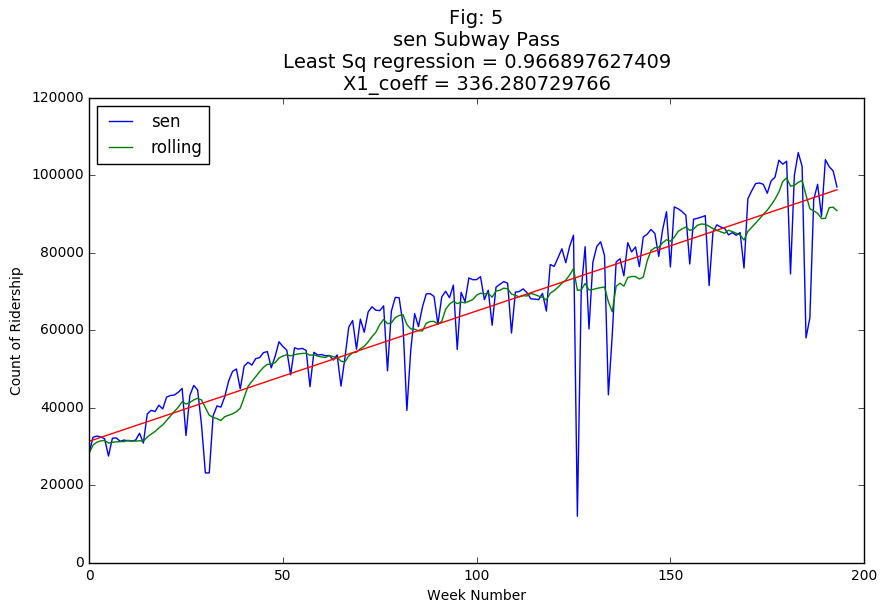

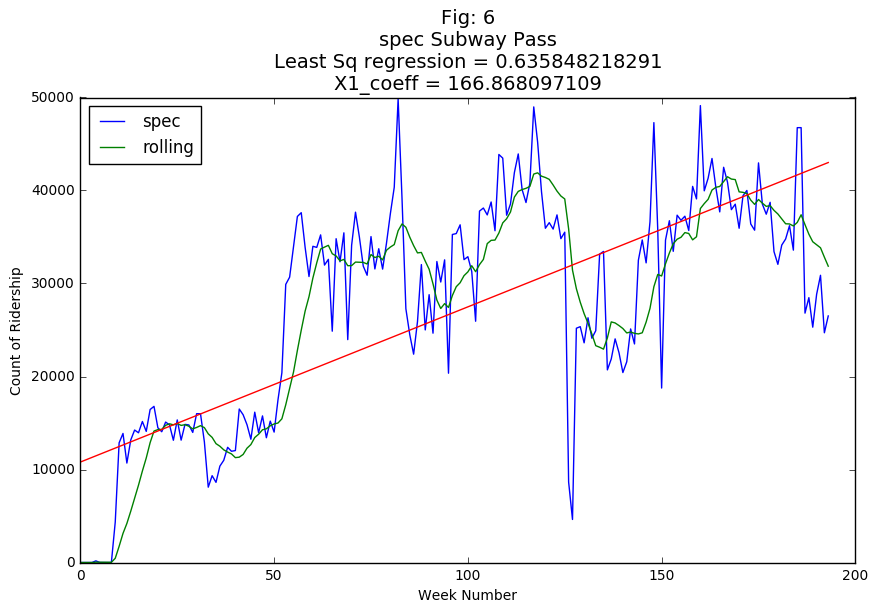

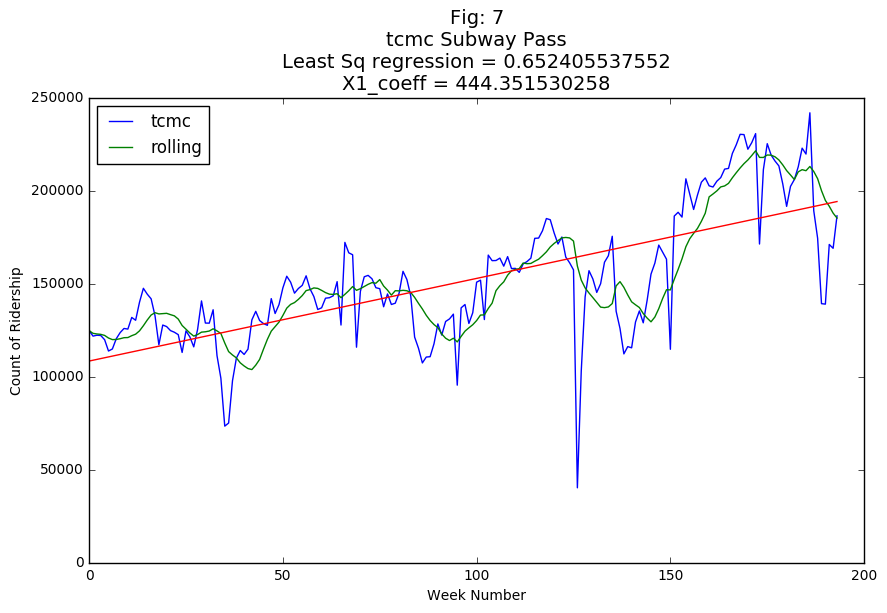

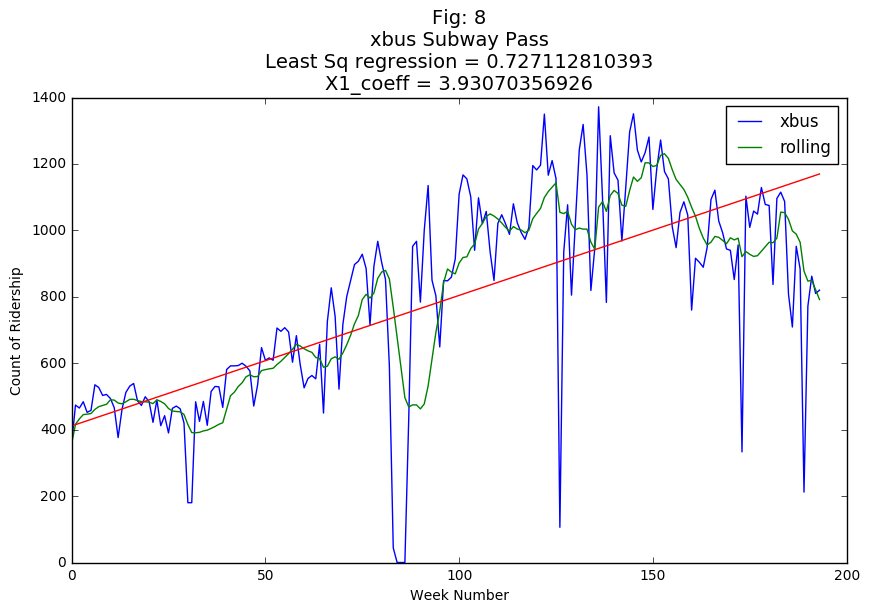

In [34]:
x = [i for i in range(0,194)]
k=1
for i in range(0, 20):
    df2 = pd.DataFrame(df1.iloc[:,i])
    df2['rolling'] = df1.iloc[:,i].rolling(window=10, min_periods=1).mean()
    model = sm.OLS(df2['rolling'], sm.add_constant(x)).fit()
    if model.rsquared > .6:
        pl.figure(figsize=(10,6))
        pl.ylabel('Count of Ridership')
        pl.xlabel('Week Number')
        pl.title(str('Fig: ' + str(k) + '\n' + df1.columns[i]) + ' Subway Pass\n' + 'Least Sq regression = ' + str(model.rsquared) + '\nX1_coeff = ' + str((model.params)[1]), fontsize=14)
        pl.plot(x, df1.iloc[:,i])
        pl.plot(x, df2['rolling'])
        pl.plot(x, model.predict(sm.add_constant(x)))
        pl.legend(loc='best')
        k+=1

#### Plots 1 - 8 display trends (increasing and decreassing) in subway ridership for each card types, selected from 05/2010 to 02/2014. Blue line: redership per card; green line: rolling mean of 10 stations; Red line: OLS regression of rolling mean.  


#### Senior ridership typesof cards have steadily increased in popularity, and  month subway type of cards have steadily decreased.

### Task_3 
Identify the 4 stations (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks).

In [35]:
i = 0
annuals = []
for i in range(0,600):
    elem = np.abs(np.fft.rfft(mta_allsum[i]))[4]
    annuals.append(elem)
    i+=1

In [36]:
station_key = [i for i in range(0,601)]

In [37]:
sorted_annual = sorted(annuals, key=float)  

In [38]:
print(sorted_annual[596:])

[2402218.5809588572, 2931895.8769513383, 2950388.929214194, 2980160.6355953491]


In [39]:
week_stations = dict(zip(station_key, annuals))
print (week_stations)

{0: 2980160.6355953491, 1: 517792.73741749104, 2: 24753.350436413995, 3: 88385.081890831862, 4: 52457.80231399824, 5: 71066.306480055428, 6: 27444.492232713321, 7: 62082.284889663111, 8: 41064.455890137586, 9: 308569.2557662293, 10: 390094.16082302487, 11: 282581.27703039791, 12: 145520.24759965949, 13: 828729.47357682534, 14: 139357.75631445771, 15: 36973.746066946886, 16: 278580.34197605011, 17: 787646.64675592002, 18: 138582.91923112568, 19: 1324540.8730565044, 20: 523471.24011364859, 21: 419674.15539881977, 22: 463323.72898364533, 23: 290709.52526702883, 24: 183478.2500498688, 25: 2.9411479855787648, 26: 534393.00314374547, 27: 739719.50967775984, 28: 672420.22450754838, 29: 310662.92020491272, 30: 283353.19790183747, 31: 345901.88403941924, 32: 2329896.5813884307, 33: 17298.049377165135, 34: 130903.20887095333, 35: 133041.54550096905, 36: 107479.20098189978, 37: 27156.693773106286, 38: 186587.07252204753, 39: 90517.537485080829, 40: 255667.4342881889, 41: 370045.94879373035, 42: 1

### 4 stations that shows the most prominent periodic trend on an annual period from the dataset:
0;
150;
194;
327

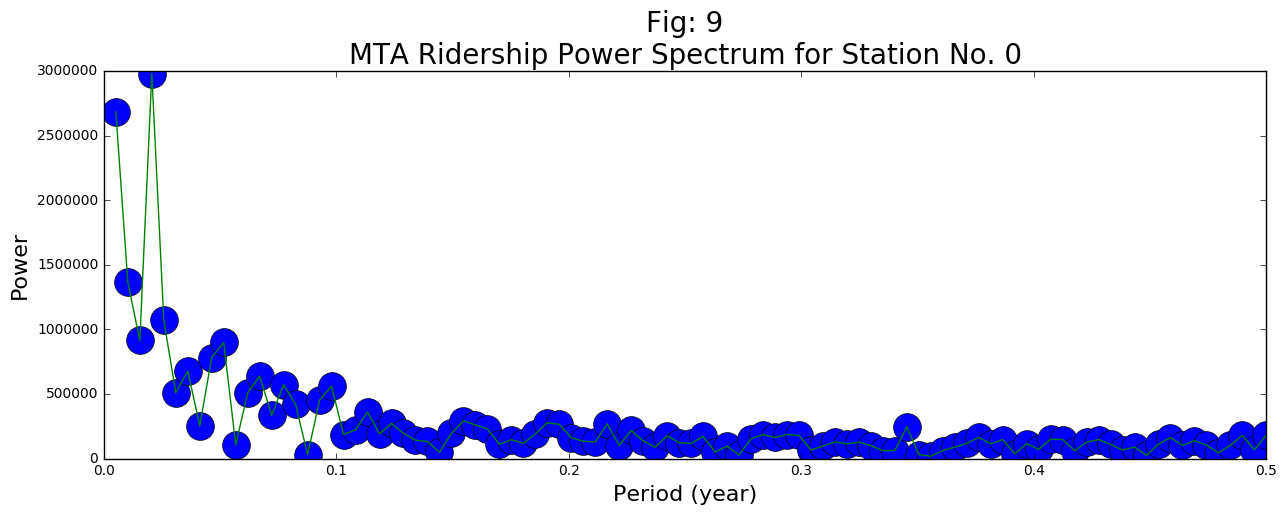

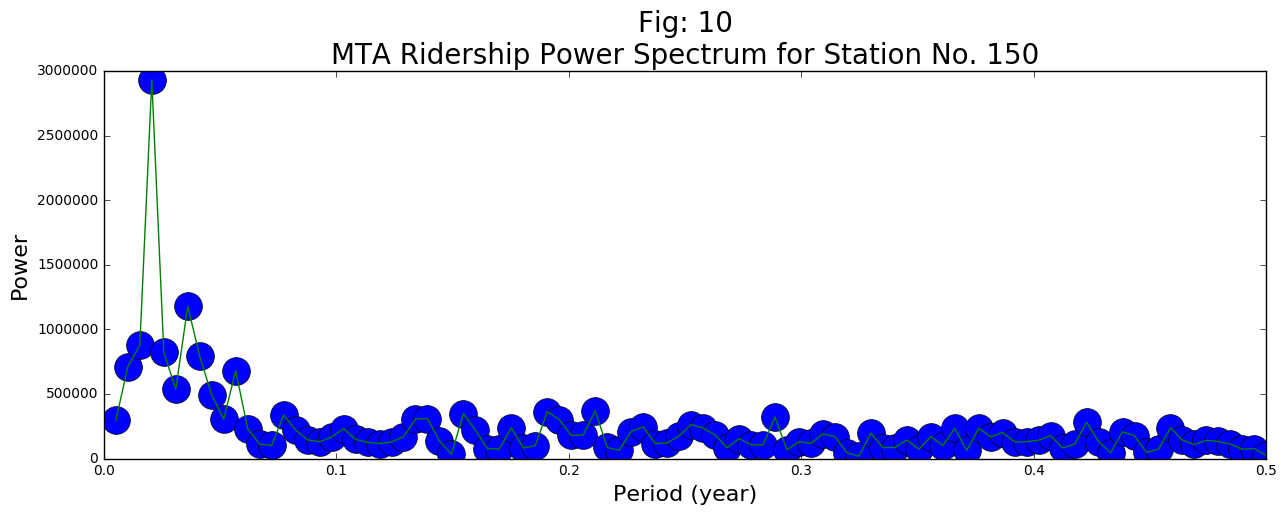

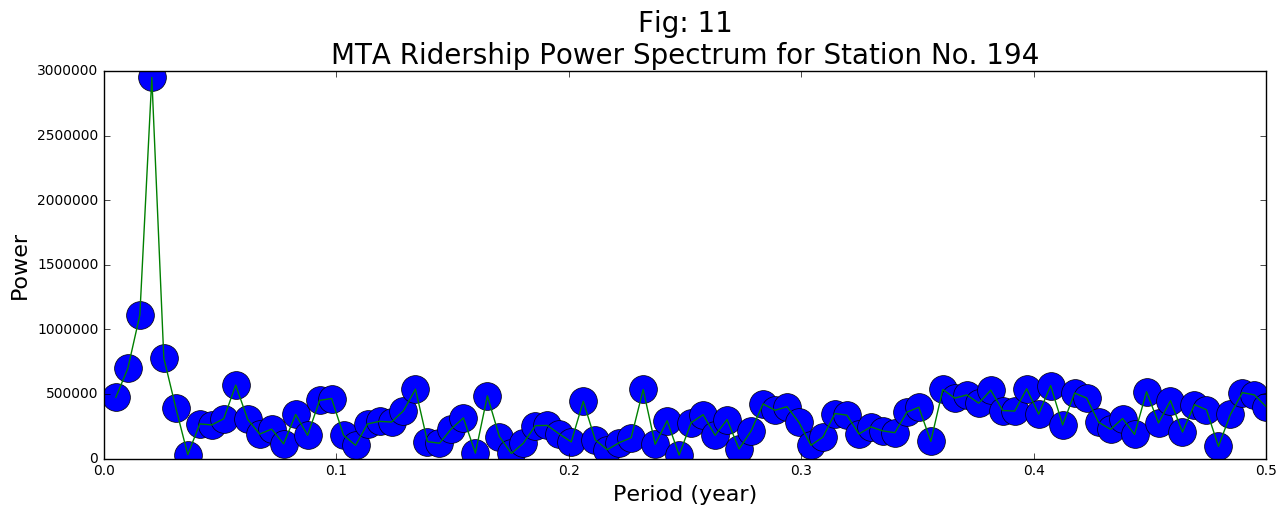

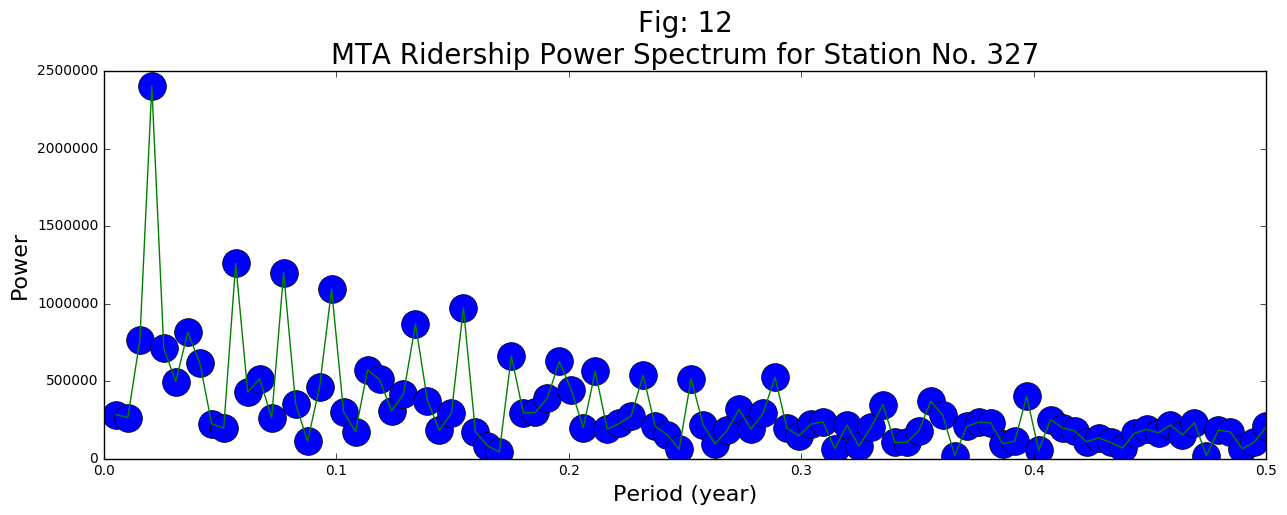

In [40]:
#Plotting the stations with highest frequency. 
N = 194
stations = [0, 150, 194, 327]
k = 9
for elem in stations:
    f = np.abs(np.fft.rfft(mta_allsum[elem]))
    fig=pl.figure(figsize=(15,5))
    ax=fig.add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    pl.xlabel('Period (year)', fontsize=16)
    pl.ylabel('Power', fontsize=16)
    pl.title('Fig: ' + str(k) + '\n' + 'MTA Ridership Power Spectrum for Station No. ' + str(elem), fontsize=20)
    k+=1

### Figures 9 to 12 display the most prominent periodic trend on an annual period for 4 stations. 0;150;194;327